In [1]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import random
import requests
import json
import time
import matplotlib.pyplot as plt

from scipy import stats
from citipy import citipy
from config import wkey


In [2]:
#Num of samples for project

smpl = 1000
# create a list of lat and lngs
slat = np.random.uniform(low=-90.000, high=90.000, size=smpl)
slng = np.random.uniform(low=-180.000, high=180.000, size=smpl)


#add list to dict then start a dataframe
samples = {
    'rand_lat':slat,
    'rand_lng':slng
          }

df1 = pd.DataFrame(samples)
df1.shape
df1.head()


,rand_lat,rand_lng
0,40.687535,-151.326395
1,3.000580,-91.804045
2,54.613665,176.880211
3,-57.780874,-106.424218
4,30.534123,106.416912


In [3]:
#use citipy to find nearest city and populate dataframe

df1['Nearest_City']=''
df1['Country']=''
    

for index, row in df1.iterrows():
    
    #row vars
    lat = row['rand_lat']
    lng = row['rand_lng']

   #populate cells
    try:
        df1.loc[index, ['Nearest_City']]   = citipy.nearest_city(lat, lng).city_name
        df1.loc[index, ['Country']]   = citipy.nearest_city(lat, lng).country_code
        
    except:
        pass
  
df1.head()

,rand_lat,rand_lng,Nearest_City,Country
0,40.687535,-151.326395,kodiak,us
1,3.000580,-91.804045,puerto ayora,ec
2,54.613665,176.880211,beringovskiy,ru
3,-57.780874,-106.424218,punta arenas,cl
4,30.534123,106.416912,nanchong,cn


In [4]:
#drop rows  which returned from citipy with same nearest city for coordinates..keep first
df1 = df1.sort_values('Nearest_City', ascending=False)
df1 = df1.drop_duplicates(subset='Nearest_City', keep='first')

In [5]:
#add columns for Temp, Humid, Cloudiness, Windspeed, and actual coords then populate via API
df1['act_lat'] =''
df1['act_lng'] =''
df1['Temperature_F']=''
df1['Humidity_Perc']=''
df1['Cloudiness_Perc']=''
df1['Wind_Speed_MPH'] =''
df1['Wind_Speed_MPH'] =''


In [6]:
#call openweathermap endpoint to get weather metrics and populate dataframe

city ='' #this is just used to print out data as the API is executing
cntry ='' #this is just used to print out data as the API is executing
response_time ='' #this is just used to print out data as the API is executing
code = '' #this is just used to print out data as the API is executing

for index, row in df1.iterrows():
    
    #build query url
    city  = row['Nearest_City']
    cntry = row['Country']
    qurl  = f'http://api.openweathermap.org/data/2.5/weather?q={city},{cntry}&units=imperial&appid={wkey}'

    
    #build a response json object
    response = requests.get(qurl)
    response_json = response.json()

   #populate cells
    try:
        df1.loc[index, ['act_lat']]         = response_json['coord']['lat']
        df1.loc[index, ['act_lng']]         = response_json['coord']['lon']
        df1.loc[index, ['Temperature_F']]   = response_json['main']['temp']
        df1.loc[index, ['Humidity_Perc']]   = response_json['main']['humidity']
        df1.loc[index, ['Cloudiness_Perc']] = response_json['clouds']['all']
        df1.loc[index, ['Wind_Speed_MPH']]  = response_json['wind']['speed']
        

        city = response_json['name']
        cntry = response_json['sys']['country']
        response_time = response.elapsed.total_seconds()
        print(f'weather response for {city}, {cntry} in {response_time} seconds')
        
    except:
        df1.loc[index, ['Temperature_F']]  = np.nan 
        code = response_json['cod']
        print(f'Error response for {city}, {cntry} code {code}')
     
    #sleep based on last response, lets us know if server slowing down
    time.sleep(response.elapsed.total_seconds())
              
        
print('The data frame has been updated via api.openweathermap.org')



Error response for zhitikara, kz code 404
weather response for Zhigansk, RU in 0.10309 seconds
weather response for Zarate, AR in 0.104719 seconds
weather response for Yulara, AU in 0.107577 seconds
weather response for Young, UY in 0.104544 seconds
weather response for Yining, CN in 0.091933 seconds
weather response for Yenagoa, NG in 0.12025 seconds
weather response for Yellowknife, CA in 0.105258 seconds
weather response for Yar-Sale, RU in 0.231588 seconds
weather response for Whitianga, NZ in 0.100956 seconds
weather response for Wanxian, CN in 0.095709 seconds
weather response for Vostok, RU in 0.108873 seconds
weather response for Vila Velha, BR in 0.092104 seconds
Error response for vila, vu code 404
weather response for Vigia, BR in 0.102815 seconds
weather response for Viedma, AR in 0.114071 seconds
weather response for Victoria, SC in 0.467591 seconds
weather response for Vestmannaeyjar, IS in 0.099069 seconds
weather response for Verkhnyaya Inta, RU in 0.101949 seconds
weat

weather response for Ponta do Sol, CV in 0.122033 seconds
weather response for Polunochnoye, RU in 0.153956 seconds
weather response for Polis, CY in 0.109678 seconds
weather response for Pleasant Point, NZ in 0.098327 seconds
weather response for Pitimbu, BR in 0.112358 seconds
weather response for Pisco, PE in 0.125936 seconds
weather response for Pimenta Bueno, BR in 0.098655 seconds
Error response for phan rang, vn code 404
weather response for Pfullendorf, DE in 0.100186 seconds
weather response for Pevek, RU in 0.099885 seconds
weather response for Peniche, PT in 0.10676 seconds
weather response for Payakumbuh, ID in 0.100451 seconds
weather response for Parauna, BR in 0.096667 seconds
weather response for Parana, AR in 0.10203 seconds
weather response for Pangody, RU in 0.161346 seconds
weather response for Pangnirtung, CA in 0.104475 seconds
weather response for Panama City, US in 0.093705 seconds
weather response for Panaba, MX in 0.095415 seconds
weather response for Palemban

weather response for Itoman, JP in 0.154378 seconds
weather response for Itarema, BR in 0.087002 seconds
weather response for Iqaluit, CA in 0.083723 seconds
weather response for Iowa City, US in 0.104979 seconds
weather response for Innerleithen, GB in 0.250804 seconds
weather response for Indianola, US in 0.087403 seconds
weather response for Imbituba, BR in 0.110182 seconds
weather response for Ilulissat, GL in 0.149548 seconds
Error response for illoqqortoormiut, gl code 404
weather response for Husavik, IS in 0.107591 seconds
Error response for hunza, pk code 404
weather response for Humaita, BR in 0.221446 seconds
weather response for Huittinen, FI in 0.101792 seconds
weather response for Hommelvik, NO in 0.093238 seconds
weather response for Hobyo, SO in 0.09633 seconds
weather response for Hobart, AU in 0.084835 seconds
weather response for Hithadhoo, MV in 0.077922 seconds
Error response for himora, et code 404
weather response for Hilo, US in 0.116353 seconds
weather response

Error response for airai, pw code 404
weather response for Agua Dulce, MX in 0.105738 seconds
Error response for achisay, kz code 404
weather response for Acari, PE in 0.413703 seconds
weather response for Acarau, BR in 0.106697 seconds
weather response for Acapulco de Juarez, MX in 0.099782 seconds
weather response for Abu Kamal, SY in 0.093938 seconds
weather response for Abadan, IR in 0.116724 seconds
The data frame has been updated via api.openweathermap.org


In [7]:
#drop rows with 404 errors
df1.dropna(subset=['Temperature_F'], inplace = True)

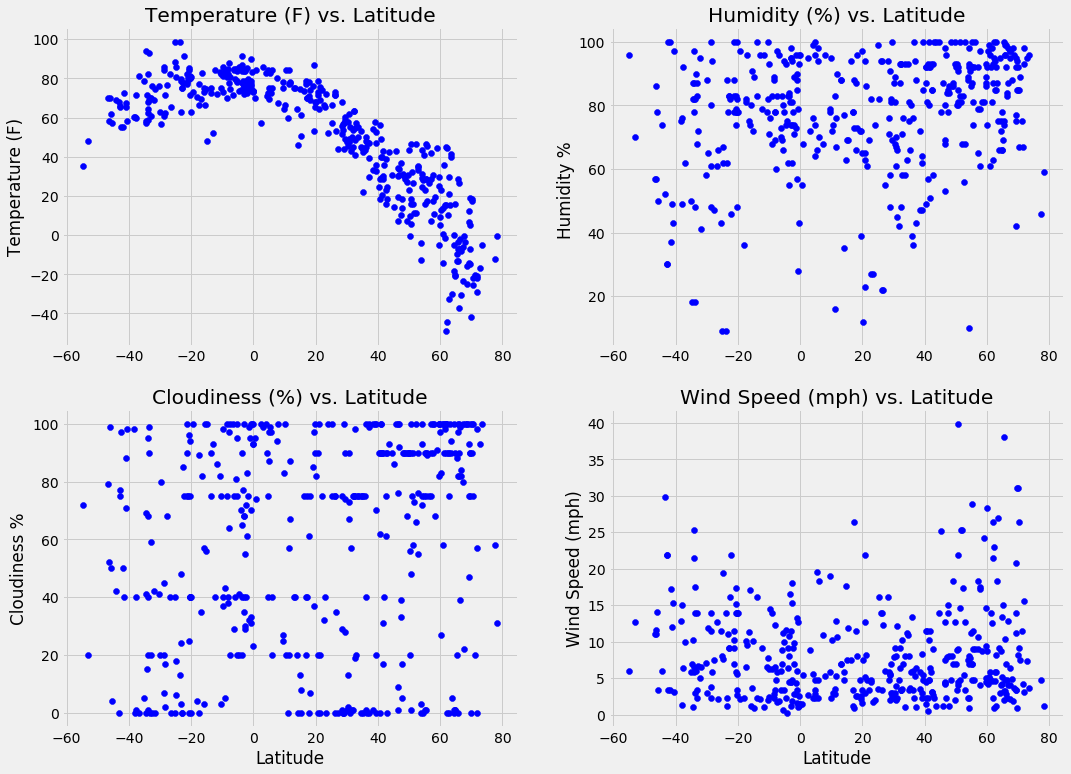

In [8]:
#Create Plots - Use Subplots

# create data for axes
lat   = df1['act_lat'].to_list()
tempF = df1['Temperature_F'].to_list()
humdP = df1['Humidity_Perc'].to_list()
cldyP = df1['Cloudiness_Perc'].to_list()
winsM = df1['Wind_Speed_MPH'].to_list()


#plot data
plt.style.use('fivethirtyeight')
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows = 2, ncols = 2,figsize=(16,12))

ax1.scatter(lat,tempF, label = 'TempVLat', c = 'b' )
ax1.set_title('Temperature (F) vs. Latitude')
#ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')

ax2.scatter(lat,humdP, label = 'HumidityVLat' , c = 'b')
ax2.set_title('Humidity (%) vs. Latitude')
#ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity % ')

ax3.scatter(lat,cldyP, label = 'CldVLat' , c = 'b')
ax3.set_title('Cloudiness (%) vs. Latitude')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness %')

ax4.scatter(lat,winsM, label = 'WindVLat' , c = 'b')
ax4.set_title('Wind Speed (mph) vs. Latitude')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')

#plt.tight_layout()
plt.show()

fig.savefig('img/Latitude_Subplots.png')

In [9]:
#Create a function to plot the different measures vs latitiude in sub plots for Northern and Southern Hemispheres

def plotLatMeasure(cat, msr, x, y, w, z):
    
    """Create sub plots for notheren and southern  of latitudes and some other measure with linear regression
         Keyword arguments:
         cat = description of what is being measured. Used for overall title and export img naming
         msr = label of the measure which is being plotted against latitude
         x = a series of floats containing the northern hemisphere latitude values
         y = a series of floats containing the northern hemisphere measure
         w = a series of floats containing the southern hemisphere latitude values
         z = a series of floats containing the southern hemisphere measure
    
    """
    
    nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(
    x, y)
    nh_fit = nh_slope * x + nh_int
    
    sh_slope, sh_int, sh_r, sh_p, st_std_err = stats.linregress(
    w, z)
    sh_fit = sh_slope * w + sh_int


    nh_corr = stats.pearsonr(x,y)
    sh_corr = stats.pearsonr(w,z)
    
    nh_line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
    sh_line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

    
    # Plot
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,figsize=(14,7))
    fig.suptitle(cat, fontsize=14, fontweight="bold")
    

    ax1.scatter(x, y, linewidth=1, marker="o")
    ax1.plot(x, nh_fit, "b--", linewidth=1)
    plt.text(0.25, 0.15, sh_line_eq, fontweight="bold",fontsize=15, color="k", transform=ax1.transAxes)
    plt.text(0.25, 0.10, "r = " +str(round(nh_corr[0],2)), fontweight="bold",fontsize=15, color="k", transform=ax1.transAxes)
    ax1.set_title('Northern Hemisphere', fontsize=10)
    ax1.set_ylabel(msr, fontsize= 10)
    ax1.set_xlabel('Latitude', fontsize= 10)

    ax2.scatter(w, z, linewidth=1, marker="o", color="r")
    ax2.plot(w, sh_fit, "r--", linewidth=1)
    plt.text(0.25, 0.15, sh_line_eq, fontweight="bold",fontsize=15, color="k", transform=ax2.transAxes)
    plt.text(0.25, 0.10, "r = " +str(round(sh_corr[0],2)), fontweight="bold",fontsize=15, color="k", transform=ax2.transAxes)
    ax2.set_title('Southern Hemisphere', fontsize=10)
    ax2.set_xlabel('Latitude', fontsize= 8)
    
    fig.savefig(f'img/Hemispheres_{msr}_vs_lat.png')
    
    plt.show()

    print(f'Correlation between latitude and {msr}: Northern Hemisphere {round(nh_corr[0],2)}, Southern Hemisphere {round(sh_corr[0],2)}')
 

In [10]:
#Create dataframes for northern and southern hemispheres
nh_DF = df1[df1['rand_lat'] >= 0]
sh_DF = df1[df1['rand_lat'] < 0]

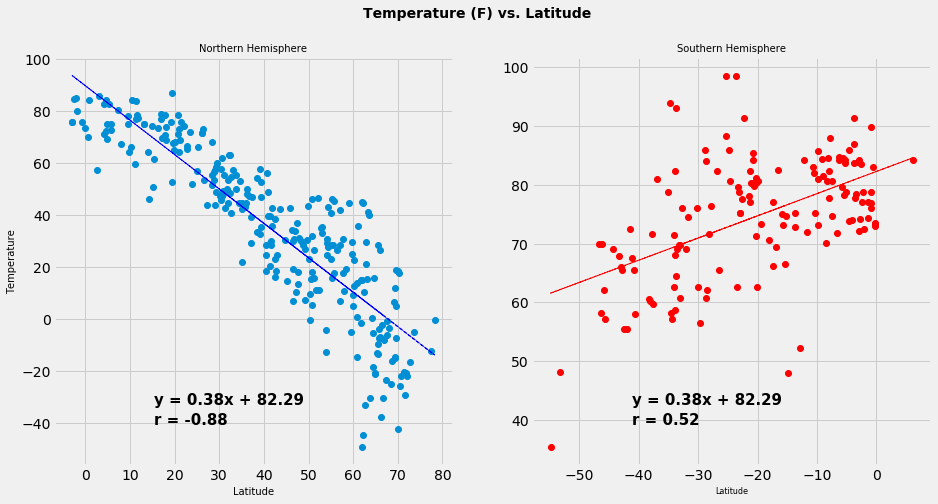

Correlation between latitude and Temperature: Northern Hemisphere -0.88, Southern Hemisphere 0.52


In [11]:
####Temperature (F) vs. Latitude####
cat = 'Temperature (F) vs. Latitude'
msr = 'Temperature'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 6].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 6].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

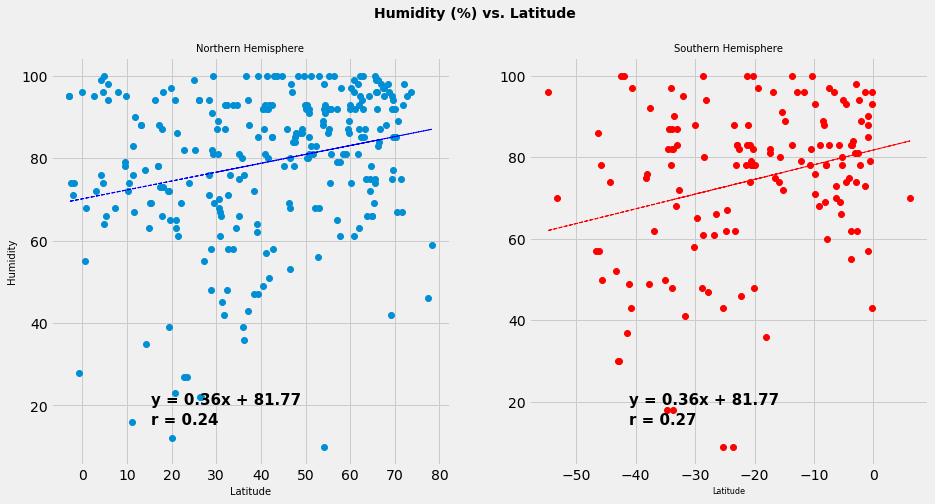

Correlation between latitude and Humidity: Northern Hemisphere 0.24, Southern Hemisphere 0.27


In [12]:
####Humidity (%) vs. Latitude####
cat = 'Humidity (%) vs. Latitude'
msr = 'Humidity'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 7].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 7].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

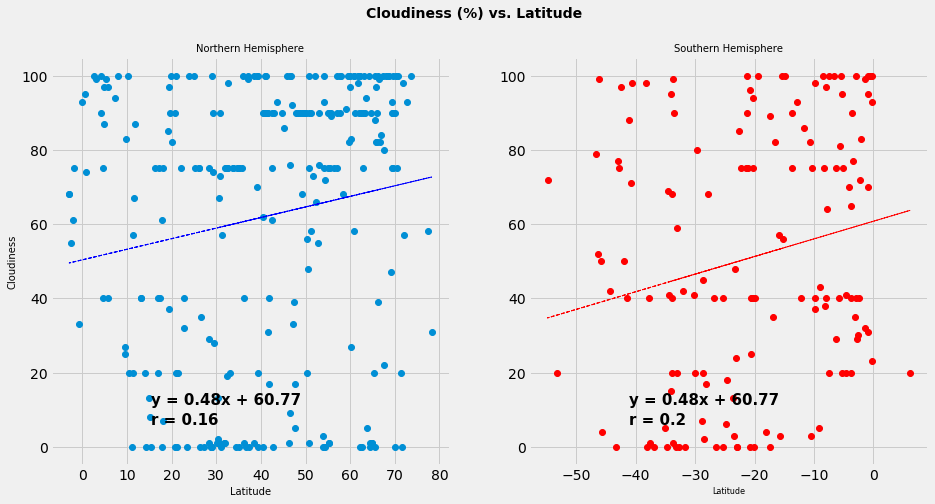

Correlation between latitude and Cloudiness: Northern Hemisphere 0.16, Southern Hemisphere 0.2


In [13]:
####Cloudiness (%) vs. Latitudee####
cat = 'Cloudiness (%) vs. Latitude'
msr = 'Cloudiness'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 8].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 8].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

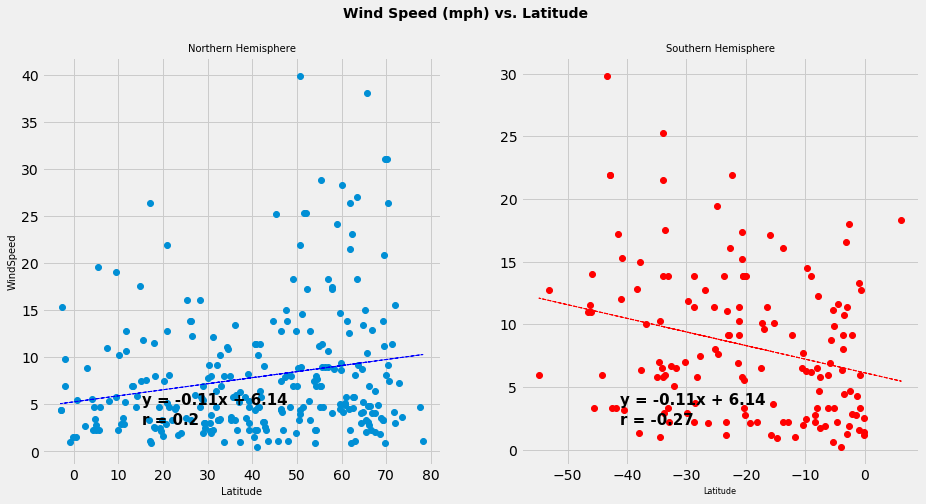

Correlation between latitude and WindSpeed: Northern Hemisphere 0.2, Southern Hemisphere -0.27


In [14]:
####Wind Speed (mph) vs. Latitude####
cat = 'Wind Speed (mph) vs. Latitude'
msr = 'WindSpeed'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 9].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 9].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

In [15]:
# Export dataframe as a CSV
df1.to_csv('WeatherPY_Data.csv', index=False, header=True)